# House Price Prediction Notebook



This notebook covers:
- Loading the data
- EDA and an example of feature enginnering
- Data preprocessing and data wrangling
- Creating a machine learning model


### Importing libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats


#### Load the dataset

In [3]:
from sklearn.utils import shuffle
df = pd.read_excel('accoData.xlsx')
df.head()
shuffle(df).head()

,Location,rent,wifi,backup power,Stove,Fridge,separate_kitchen,curfew,distance,visitors,...,Water_tank,maid,gas_stove,gyser,gender,swimming_pool,per_room,beds,security,meals
54,mt pleasant heights,120,yes,yes,yes,yes,no,yes,40.0,yes,...,no,no,no,no,boys,no,3,yes,no,no
135,mt pleasant,220,yes,no,yes,yes,yes,yes,9.0,yes,...,yes,no,yes,no,both,no,3,NaN,no,no
369,mt pleasant heights,120,yes,yes,yes,yes,yes,no,2.0,yes,...,no,no,no,no,girls,no,4,yes,no,no
239,mt pleasant,170,yes,yes,yes,yes,yes,no,5.0,yes,...,yes,no,yes,no,girls,no,4,yes,yes,no
257,parirenyatwa,140,yes,yes,yes,yes,no,yes,40.0,yes,...,no,no,no,yes,boys,no,4,yes,yes,yes


In [4]:
print('df data shape :', df.shape)

df data shape : (428, 22)


# DATA CLEANING

In [5]:
df['Aircon'].value_counts()


Aircon
no    428
Name: count, dtype: int64

In [6]:
# deleting aircon column since it is too imbalanced
del df['Aircon']


In [7]:
#mean minutes from each location to  UZ
df = df.rename(columns={'backup power': 'backupPower'})
df['beds'] = (df['beds'])
result = df.groupby('Location')['distance'].mean()
result

Location
Alex park               2.000000
Epping                  7.000000
avenue                 35.642857
avondale               15.900000
belgravia              22.500000
belgravia shops        11.750000
borrowdale              8.333333
brighton road          14.000000
churchill              10.000000
close to belgravia      3.666667
epping road             8.000000
groombridge            10.000000
hatclif                65.000000
hatcliff               58.923077
hatcliffe              70.000000
marlbrough             28.875000
mt  pleasant           15.333333
mt pleasant            17.148515
mt pleasant heights    19.138889
mt pleasant heigths    15.000000
mt-pleasant             7.000000
mt_pleasant            16.400000
mt_pleasant_arundel    23.000000
near parirenyatwa      18.600000
near uz churchhill      8.333333
near uz main gate      12.000000
opposite uz            13.541667
opposite_uz             2.777778
parirenyatwa           30.000000
pendenis               20.000000
p

In [8]:


df[df.Location == 'opposite_uz']

,Location,rent,wifi,backupPower,Stove,Fridge,separate_kitchen,curfew,distance,visitors,...,Water_tank,maid,gas_stove,gyser,gender,swimming_pool,per_room,beds,security,meals
9,opposite_uz,170,yes,yes,yes,yes,yes,no,5.0,yes,...,yes,yes,no,no,both,no,2,yes,yes,no
10,opposite_uz,170,yes,yes,yes,yes,yes,no,1.0,yes,...,yes,yes,no,no,girls,no,5,yes,yes,no
11,opposite_uz,170,yes,yes,yes,yes,yes,no,5.0,yes,...,yes,yes,no,no,girls,no,3,yes,yes,no
12,opposite_uz,130,yes,yes,yes,yes,yes,no,1.0,yes,...,yes,yes,no,no,both,no,5,yes,yes,no
270,opposite_uz,170,yes,yes,yes,yes,yes,no,1.0,yes,...,yes,yes,no,no,girls,no,5,yes,yes,no
397,opposite_uz,170,yes,yes,yes,yes,yes,no,5.0,yes,...,yes,yes,no,no,both,no,2,yes,yes,no
398,opposite_uz,170,yes,yes,yes,yes,yes,no,1.0,yes,...,yes,yes,no,no,girls,no,5,yes,yes,no
399,opposite_uz,170,yes,yes,yes,yes,yes,no,5.0,yes,...,yes,yes,no,no,girls,no,3,yes,yes,no
400,opposite_uz,130,yes,yes,yes,yes,yes,no,1.0,yes,...,yes,yes,no,no,both,no,5,yes,yes,no


In [9]:
df.Location.value_counts()
df.columns

Index(['Location', 'rent', 'wifi', 'backupPower', 'Stove', 'Fridge',
       'separate_kitchen', 'curfew', 'distance', 'visitors', 'Shelves',
       'Water_tank', 'maid', 'gas_stove', 'gyser', 'gender', 'swimming_pool',
       'per_room', 'beds', 'security', 'meals'],
      dtype='object')

In [10]:
df.curfew.value_counts()

curfew
no     245
yes    183
Name: count, dtype: int64

In [11]:
df[df['Stove'] == 'no']
# Stove is very crucial since it clusters cheap houses

,Location,rent,wifi,backupPower,Stove,Fridge,separate_kitchen,curfew,distance,visitors,...,Water_tank,maid,gas_stove,gyser,gender,swimming_pool,per_room,beds,security,meals
110,hatcliff,55,no,yes,no,yes,yes,yes,60.0,yes,...,yes,no,no,no,girls,no,3,yes,no,no
218,vainona,85,yes,yes,no,yes,yes,yes,60.0,yes,...,yes,no,yes,yes,boys,no,2,yes,no,no
305,hatcliff,55,no,yes,no,yes,yes,yes,60.0,yes,...,yes,no,no,no,both,yes,2,yes,yes,no
343,hatcliff,55,no,yes,no,yes,yes,yes,60.0,yes,...,yes,no,no,no,girls,no,2,yes,no,no
353,vainona,85,yes,yes,no,yes,yes,yes,60.0,yes,...,yes,no,yes,yes,boys,no,2,yes,no,no


In [12]:
df[df.Fridge == 'no']
# fridge feature has no high relevance to this dataset

,Location,rent,wifi,backupPower,Stove,Fridge,separate_kitchen,curfew,distance,visitors,...,Water_tank,maid,gas_stove,gyser,gender,swimming_pool,per_room,beds,security,meals
3,mt_pleasant,100,yes,yes,yes,no,yes,yes,15.0,yes,...,yes,yes,yes,yes,girls,no,3,yes,no,no
132,mt pleasant,160,yes,yes,yes,no,yes,yes,8.0,yes,...,yes,no,yes,yes,girls,no,2,NaN,yes,no
327,mt pleasant,160,yes,yes,yes,no,yes,yes,8.0,yes,...,yes,no,yes,no,both,no,3,yes,no,no
391,mt_pleasant,100,yes,yes,yes,no,yes,yes,15.0,yes,...,yes,yes,yes,yes,girls,no,3,yes,no,no


In [13]:
df.separate_kitchen.value_counts()
df[df.separate_kitchen == 'no']
# sepearate kitchen has many counts  so releveant

,Location,rent,wifi,backupPower,Stove,Fridge,separate_kitchen,curfew,distance,visitors,...,Water_tank,maid,gas_stove,gyser,gender,swimming_pool,per_room,beds,security,meals
26,Epping,165,yes,yes,yes,yes,no,no,7.0,yes,...,yes,no,yes,no,both,no,2,yes,no,no
27,Alex park,150,yes,no,yes,yes,no,no,2.0,yes,...,yes,no,yes,no,both,no,3,yes,yes,no
28,mt-pleasant,130,yes,no,yes,yes,no,no,7.0,yes,...,yes,no,yes,no,both,no,2,yes,no,no
54,mt pleasant heights,120,yes,yes,yes,yes,no,yes,40.0,yes,...,no,no,no,no,boys,no,3,yes,no,no
63,mt pleasant,100,yes,yes,yes,yes,no,yes,30.0,no,...,yes,no,yes,no,girls,no,2,yes,no,no
64,mt pleasant,125,yes,yes,yes,yes,no,yes,30.0,no,...,yes,no,yes,no,girls,no,3,yes,no,no
94,opposite uz,165,yes,yes,yes,yes,no,yes,5.0,no,...,yes,no,yes,yes,both,no,3,yes,yes,no
96,uz main gate,130,yes,yes,yes,yes,no,yes,10.0,yes,...,yes,no,yes,yes,girls,no,2,yes,yes,no
117,mt pleasant heights,135,yes,yes,yes,yes,no,no,30.0,yes,...,yes,no,yes,yes,girls,no,2,yes,no,no
118,mt pleasant,135,yes,yes,yes,yes,no,yes,45.0,yes,...,yes,no,yes,no,girls,no,4,yes,no,no


In [14]:
df.Location.value_counts()

Location
mt pleasant            101
opposite uz             48
uz main gate            41
mt pleasant heights     36
mt_pleasant             27
marlbrough              25
vainona                 18
avenue                  14
hatcliff                13
avondale                11
near uz main gate       10
opposite_uz              9
parirenyatwa             8
brighton road            7
pomona                   6
near parirenyatwa        5
mt_pleasant_arundel      5
groombridge              5
belgravia shops          4
pendenis                 3
close to belgravia       3
borrowdale               3
mt  pleasant             3
epping road              3
near uz churchhill       3
belgravia                3
churchill                3
hatcliffe                2
hatclif                  2
mt-pleasant              1
Alex park                1
Epping                   1
mt pleasant heigths      1
Name: count, dtype: int64

In [15]:

#standardizing location names

df.loc[df.Location == 'mt-pleasant', 'Location'] = 'mt_pleasant'
df.loc[df.Location == 'mt pleasant', "Location"] = 'mt_pleasant'
df.loc[df.Location == 'mt  pleasant', "Location"] = 'mt_pleasant'
df.loc[df.Location == 'mt pleasant heights', "Location"] = 'mt_pleasant'
df.loc[df.Location == 'mt pleasant heigths', "Location"] = 'mt_pleasant'
# df.loc[df.Location == 'mount_pleasant', "Location"  ]= 'mt_pleasant'
df.loc[df.Location == 'mt_pleasant_arundel', "Location"] = 'arundel'
df.loc[df.Location == 'hatclif', "Location"] = 'hatcliff'
df.loc[df.Location == 'hatcliffe', "Location"] = 'hatcliff'
df.loc[df.Location == 'uz main gate', "Location"] = 'main_gate'
df.loc[df.Location == 'near uz main gate', "Location"] = 'main_gate'
df.loc[df.Location == 'opposite uz', "Location"] = 'op_uz'
df.loc[df.Location == 'brighton road', "Location"] = 'brighton_road'
df.loc[df.Location == 'near parirenyatwa', "Location"] = 'parirenyatwa'
df.loc[df.Location == 'belgravia shops', "Location"] = 'belgravia'
df.loc[df.Location == 'close to belgravia', "Location"] = 'belgravia'
df.loc[df.Location == 'near uz churchhill', "Location"] = 'churchill'
df.loc[df.Location == 'epping road', "Location"] = 'epping'
df.loc[df.Location == 'Epping', "Location"] = 'epping'
df.loc[df.Location == 'Epping', "Location"] = 'epping'
df.loc[df.Location == 'opposite_uz', "Location"] = 'op_uz'
# df.loc[(df.Location == 'op_uz') & df., "Location"  ]= 'op_uz'





In [16]:
# aggregating meaningful distance per location

np.random.seed(43)
df.Location.value_counts()
df[(df.Location == 'op_uz') & (df.distance > 10) & (df.rent > 165)]
# df.loc[(df.Location == 'op_uz') & (df.distance> 10) &(df.rent > 169)   & (df.rent< 180), 'distance'] = np.random.randint(3,7,
# size=len(df.query('Location == "op_uz" & rent >169  & rent < 180 & distance>10  '))
# )
df.loc[(df.Location == 'pomona'), 'distance'] = np.random.randint(30, 40)
df.loc[(df.Location == 'belgravia'), 'distance'] = np.random.randint(
    10, 20, size=len(df.query('Location == "belgravia"')))
df.loc[(df.Location == 'belgravia'), 'distance'] = np.random.randint(
    10, 20, size=len(df.query('Location == "belgravia"')))
# df.loc[(df.Location == 'avondale' ) & (df.rent> 179), 'distance'] = np.random.randint(20,30,
#                                                                                     #   size=len(df.query('Location == "avondale" & rent > 179 '))
#                                                                                       )
# df.loc[(df.Location == 'avondale' ) & (df.rent< 179), 'distance'] = np.random.randint(10,20,
#                                                                                     #   size=len(df.query('Location == "avondale" & rent > 179 '))
#                                                                                       )
df.loc[(df.Location == 'parirenyatwa') & (df.rent > 150), 'distance'] = np.random.randint(5, 10,
                                                                                          size=len(
                                                                                              df.query('Location == "parirenyatwa" & rent >150'))
                                                                                          )
df.loc[(df.Location == 'parirenyatwa') & (df.rent < 150), 'distance'] = np.random.randint(15, 20,
                                                                                          size=len(
                                                                                              df.query('Location == "parirenyatwa" & rent <150'))
                                                                                          )
# df.loc[(df.Location == 'op_uz') & (df.rent > 180) & (df.meals == 'yes'), 'distance'] = np.random.randint(1,3)
df.loc[(df.Location == 'op_uz') & (df.rent < 151) & (
    df.distance > 10), 'Location'] = 'mt_pleasant'
df.loc[(df.Location == 'op_uz') & (df.rent < 170) & (
    df.distance > 10), 'Location'] = 'mt_pleasant'
df.loc[(df.Location == 'mt_pleasant') & (df.distance < 8)
       & (df.rent > 170), 'Location'] = 'op_uz'
df.loc[(df.Location == 'hatcliff') & (df.distance < 60), 'distance'] = np.random.randint(70, 100,
                                                                                         size=len(
                                                                                             df.query('Location == "hatcliff" & distance <60'))
                                                                                         )
df.loc[(df.Location == 'vainona') & (df.distance < 11), 'distance'] = np.random.randint(
    30, 35, size=len(df.query('Location == "vainona" & distance<11')))
# df.loc[(df.Location == 'vainona') & (df.rent <100) , 'distance'] = np.random.randint(20, 30, size=len(df.query('Location == "vainona" & rent <100')))
# df = df[df.Location != 'arundel']
df.loc[(df.rent >= 170) & (df.Location != 'op_uz'), 'meals'] = 'yes'
# df.loc[(df.rent>= 190) & (df.Location != 'op_uz'), 'security' ] = 'yes'
# df.loc[(df.rent>= 190) & (df.Location != 'op_uz'), 'gyser' ] = 'yes'
# df.loc[(df.meals == 'yes'), 'maid' ] = 'yes'

# df[(df.Location == 'op_uz') &(df.rent < 141)]
# df = df[df.Location != 'mt_pleasant']
# df[df.rent>150]
# df = df[df.Location == 'mt_pleasant']

# sns.scatterplot(df.distance, df.rent, hue= df.meals)

### Handle missing data


In [17]:

result = df.groupby('Location')['distance'].mean()
result

Location
Alex park         2.000000
arundel          23.000000
avenue           35.642857
avondale         15.900000
belgravia        13.200000
borrowdale        8.333333
brighton_road    14.000000
churchill         9.166667
epping            7.750000
groombridge      10.000000
hatcliff         79.250000
main_gate         8.372549
marlbrough       28.875000
mt_pleasant      17.916201
op_uz             8.155556
parirenyatwa     12.307692
pendenis         20.000000
pomona           34.000000
vainona          31.000000
Name: distance, dtype: float64

In [18]:
# handle missing per_room number
df.loc[df.per_room == '#####', "per_room"] = 4
df.per_room.value_counts()
df.columns

Index(['Location', 'rent', 'wifi', 'backupPower', 'Stove', 'Fridge',
       'separate_kitchen', 'curfew', 'distance', 'visitors', 'Shelves',
       'Water_tank', 'maid', 'gas_stove', 'gyser', 'gender', 'swimming_pool',
       'per_room', 'beds', 'security', 'meals'],
      dtype='object')

In [19]:
# handle missing location
df.Location.dropna(inplace=True)
df.isna().sum()

Location             3
rent                 0
wifi                 0
backupPower          0
Stove                0
Fridge               0
separate_kitchen     0
curfew               0
distance             6
visitors             0
Shelves              0
Water_tank           0
maid                 0
gas_stove            0
gyser                3
gender               0
swimming_pool        0
per_room             1
beds                20
security             0
meals                0
dtype: int64

In [20]:
df.loc[df.gyser == ' yes', 'gyser'] = 'yes'
df = df.loc[df.gyser != ' yes']
df.loc[df.beds.isna(), 'beds'] = 'yes'

In [21]:
# impute missing distance

distance_dict = {}

for location in df.Location.unique():

    location_data = df[df['Location'] == location]
    avg_distance = location_data.distance.mean()
    distance_dict[location] = avg_distance
    df.loc[(df.Location == location) & (
        df.distance.isna()), 'distance'] = avg_distance


# print(distance_dict)
    # print(df.loc[df.Location == location , : ])
df.isna().sum()

Location            3
rent                0
wifi                0
backupPower         0
Stove               0
Fridge              0
separate_kitchen    0
curfew              0
distance            1
visitors            0
Shelves             0
Water_tank          0
maid                0
gas_stove           0
gyser               3
gender              0
swimming_pool       0
per_room            1
beds                0
security            0
meals               0
dtype: int64

In [22]:
df.dropna(axis=0, inplace=True)
df.isna().sum()

Location            0
rent                0
wifi                0
backupPower         0
Stove               0
Fridge              0
separate_kitchen    0
curfew              0
distance            0
visitors            0
Shelves             0
Water_tank          0
maid                0
gas_stove           0
gyser               0
gender              0
swimming_pool       0
per_room            0
beds                0
security            0
meals               0
dtype: int64

In [23]:
#converting dtypes to category
df.per_room = df.per_room.astype('int64')
df = df.assign(**{col: df[col].astype('category') for col in df.select_dtypes(include='object')})

df.dtypes

Location            category
rent                   int64
wifi                category
backupPower         category
Stove               category
Fridge              category
separate_kitchen    category
curfew              category
distance             float64
visitors            category
Shelves             category
Water_tank          category
maid                category
gas_stove           category
gyser               category
gender              category
swimming_pool       category
per_room               int64
beds                category
security            category
meals               category
dtype: object

## DATA VISUALIZATIONS

2.1626591375832613


Text(0.5, 0, 'distance (minutes)')

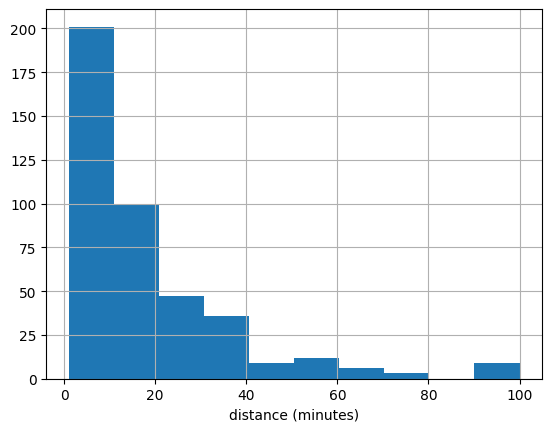

In [24]:
# (df.distance).plot.hist()
from scipy.stats import skew
print(skew(df.distance))
df.distance.hist()
plt.xlabel('distance (minutes)')

## PRIMARY VISUALIZATIONS


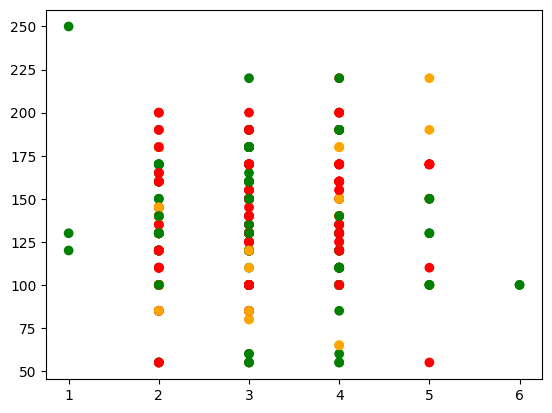

In [25]:
plt.scatter(df.per_room, df.rent, c=np.where(df.gender == 'girls',
            'red', np.where(df.gender == 'boys', 'orange', 'green')))



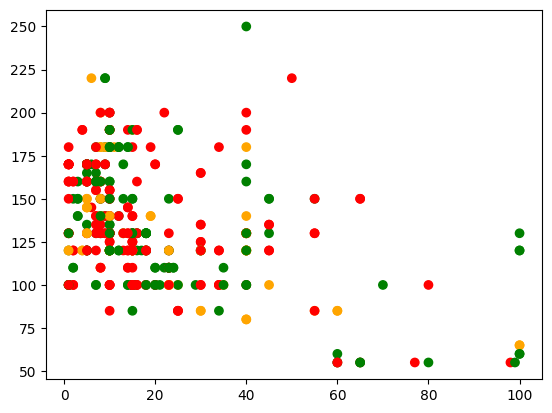

In [26]:
plt.scatter(df.distance, df.rent, c=np.where(df.gender == 'girls',
            'red', np.where(df.gender == 'boys', 'orange', 'green')))

Text(0, 0.5, 'rent')

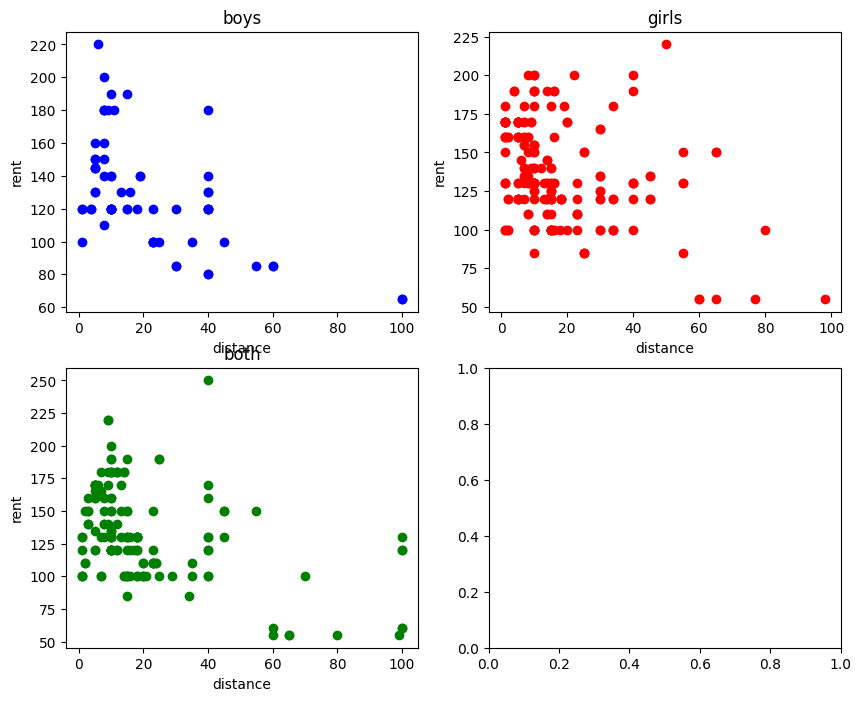

In [27]:
fig, ((ax, ax1), (ax2, ax3)) = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
ax.scatter(df[df.gender == 'boys'].distance,
           df[df.gender == 'boys'].rent, c='blue')
ax1.scatter(df[df.gender == 'girls'].distance,
            df[df.gender == 'girls'].rent, c='red')
ax2.scatter(df[df.gender == 'both'].distance,
            df[df.gender == 'both'].rent, c='green')
ax.set_title('boys')
ax1.set_title('girls')
ax2.set_title('both')

ax.set_xlabel('distance')
ax1.set_xlabel('distance')
ax2.set_xlabel('distance')

ax.set_ylabel('rent')
ax1.set_ylabel('rent')
ax2.set_ylabel('rent')

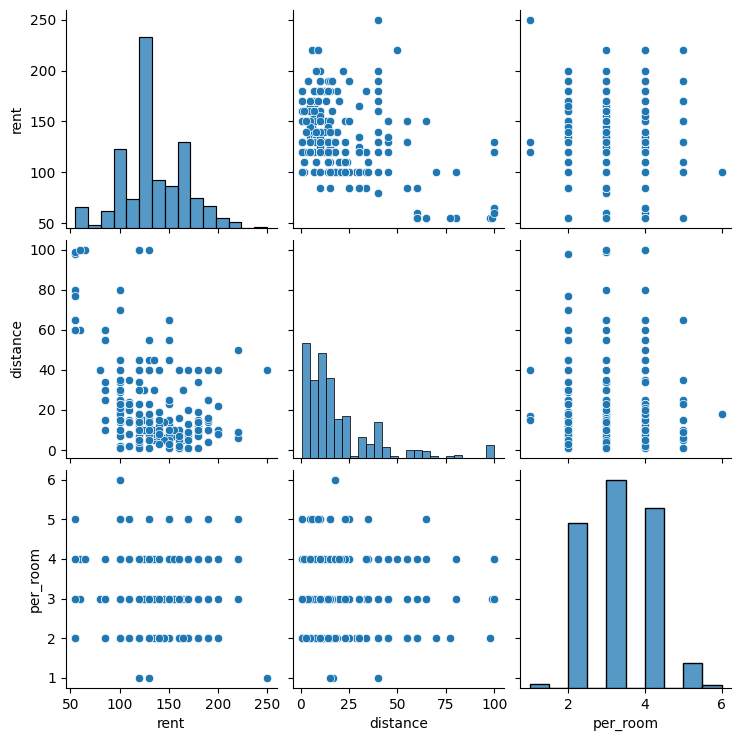

In [28]:
sns.pairplot(data=df)

### HANDLING OUTLIERS


Text(0.5, 0, 'distance (minutes)')

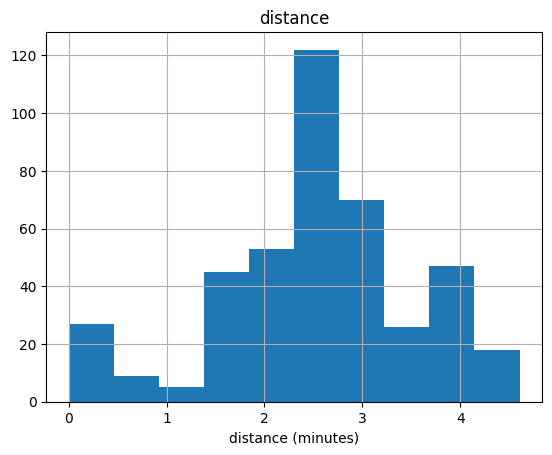

In [29]:
dist = np.log(df[['distance']])
df.distance = dist
dist.hist()
plt.xlabel('distance (minutes)')

In [30]:
df.loc[df.gender == 'boys ', 'gender'] = 'boys'
# df = df.loc[df.gender != 'boys ']
df.Location.value_counts()
df

,Location,rent,wifi,backupPower,Stove,Fridge,separate_kitchen,curfew,distance,visitors,...,Water_tank,maid,gas_stove,gyser,gender,swimming_pool,per_room,beds,security,meals
0,mt_pleasant,130,yes,yes,yes,yes,yes,no,2.890372,yes,...,yes,no,no,no,both,no,2,yes,no,no
1,mt_pleasant,120,yes,yes,yes,yes,yes,no,2.890372,yes,...,yes,no,no,no,both,no,4,yes,no,no
2,mt_pleasant,100,yes,yes,yes,yes,yes,no,2.890372,yes,...,yes,no,no,no,both,no,6,yes,no,no
3,mt_pleasant,100,yes,yes,yes,no,yes,yes,2.708050,yes,...,yes,yes,yes,yes,girls,no,3,yes,no,no
4,mt_pleasant,120,yes,yes,yes,yes,yes,no,2.890372,yes,...,yes,yes,no,yes,girls,no,2,yes,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,avondale,100,yes,yes,yes,yes,yes,no,0.000000,yes,...,yes,no,no,no,girls,no,3,yes,yes,no
424,mt_pleasant,100,yes,yes,yes,yes,yes,yes,2.302585,yes,...,yes,yes,no,no,girls,no,4,yes,yes,no
425,parirenyatwa,170,yes,yes,yes,yes,yes,no,2.197225,yes,...,yes,yes,yes,no,girls,no,5,yes,yes,yes
426,belgravia,180,yes,no,yes,yes,yes,yes,2.302585,yes,...,yes,yes,yes,no,both,no,3,yes,yes,yes


<Axes: xlabel='rent'>

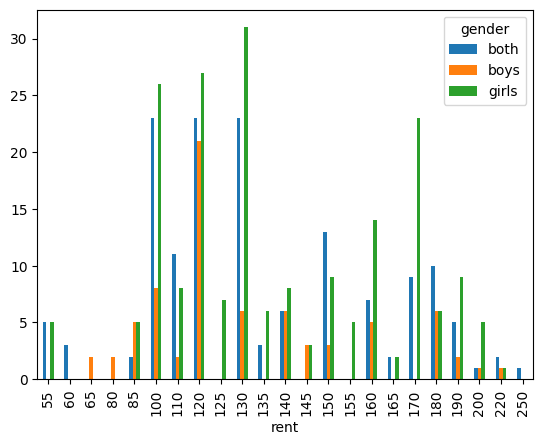

In [31]:
ct = pd.crosstab(df.gender, df.rent)

ct.T.plot(kind='bar')

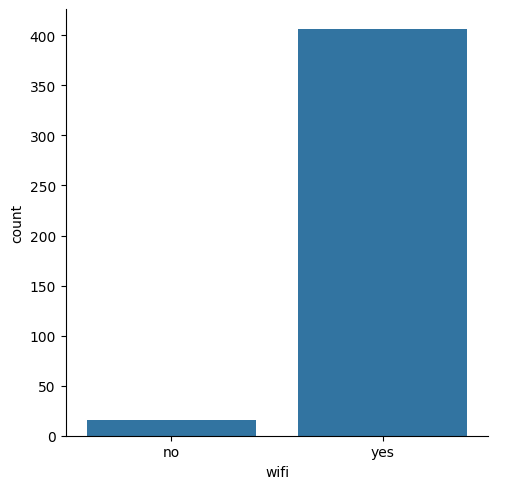

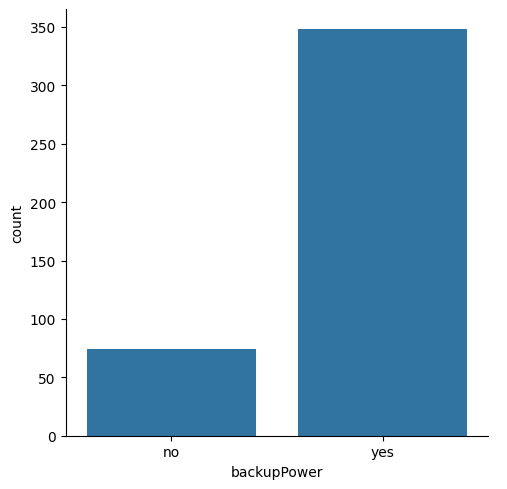

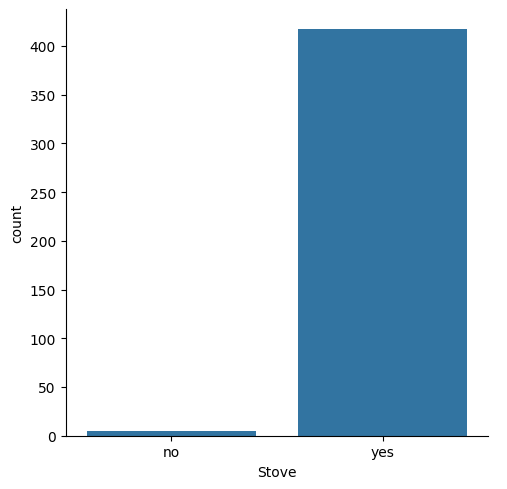

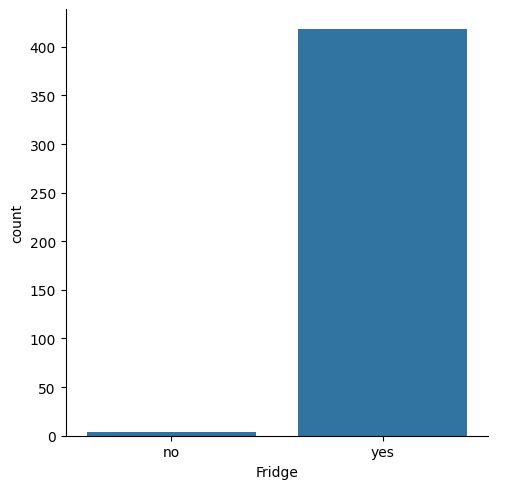

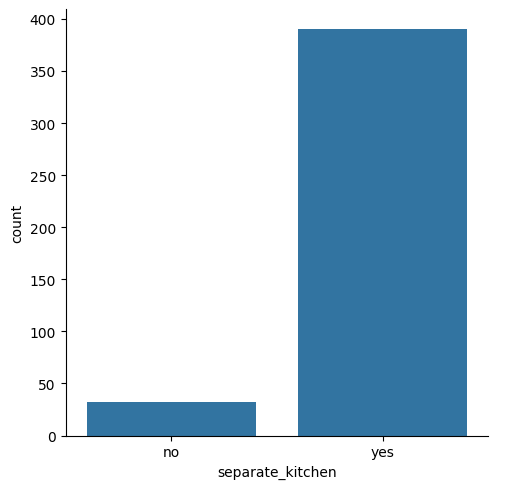

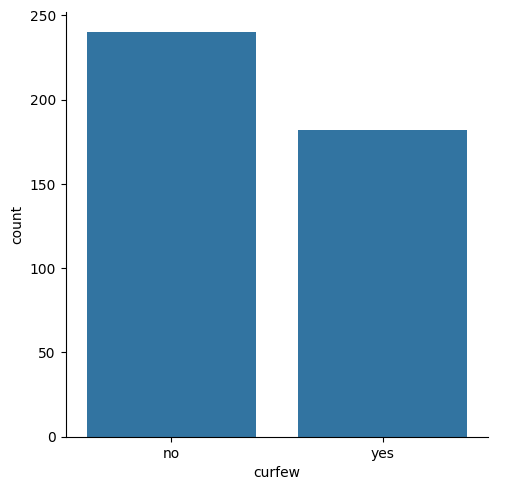

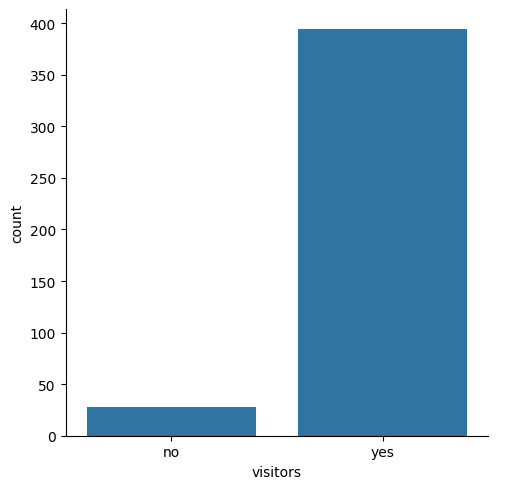

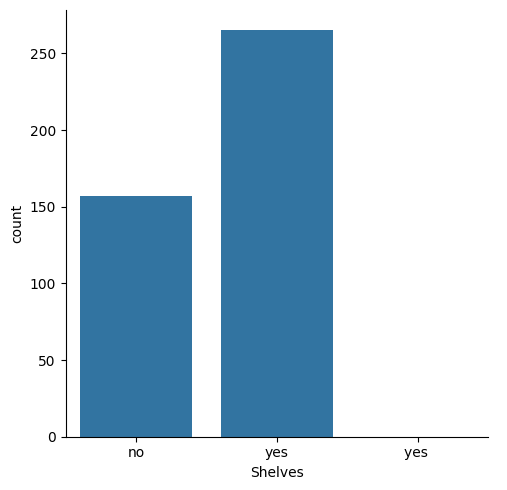

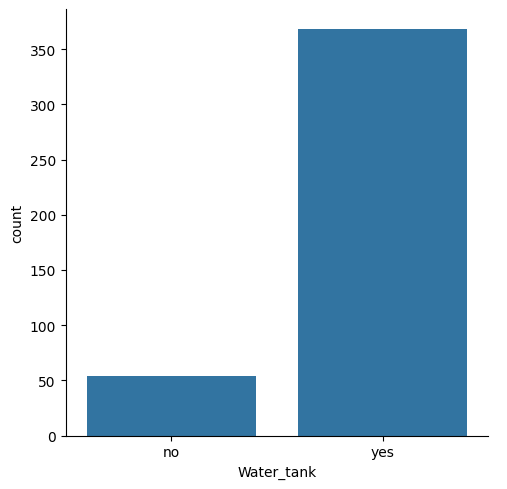

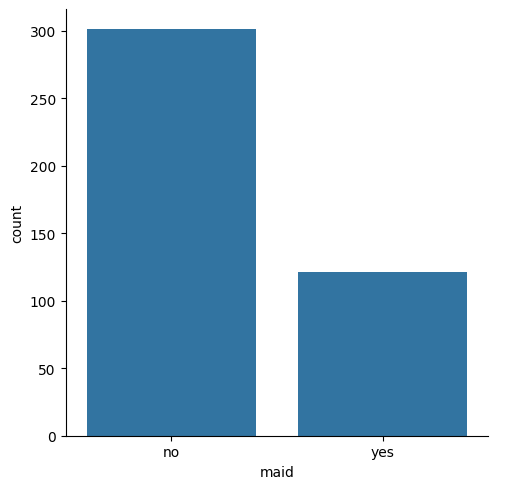

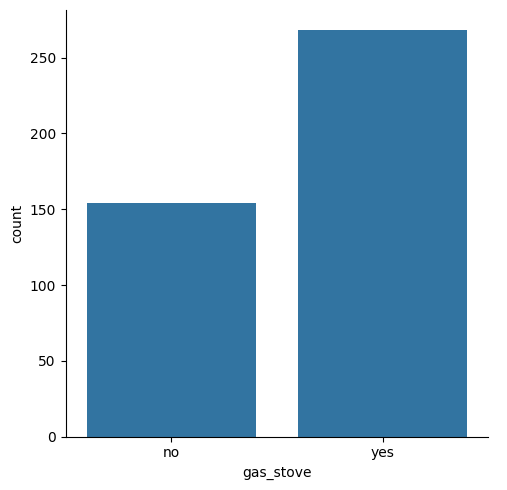

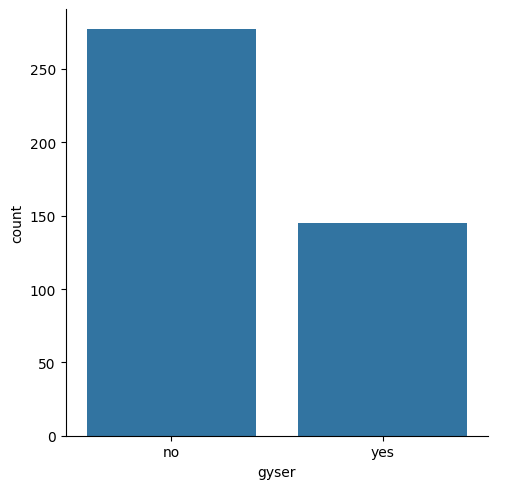

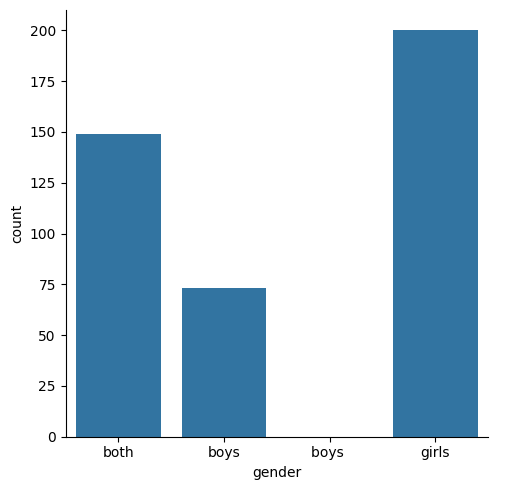

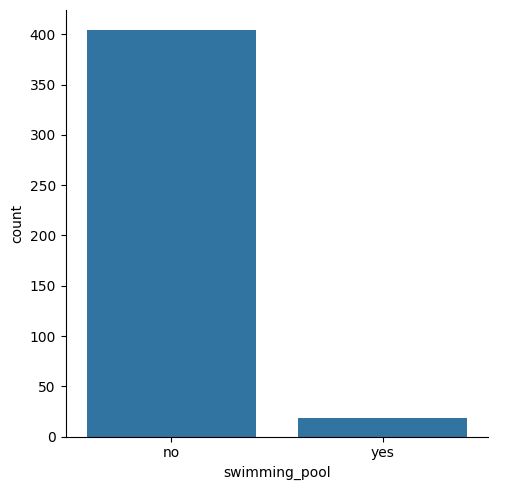

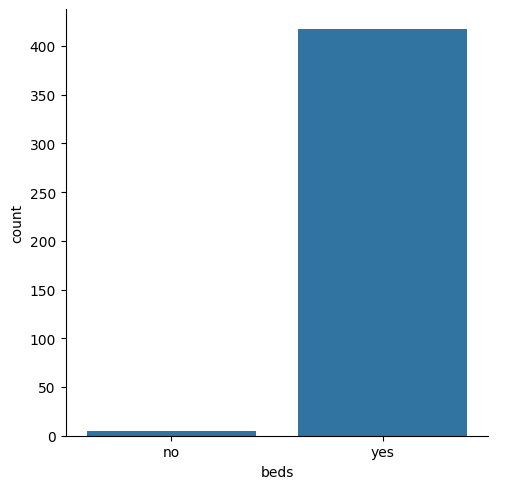

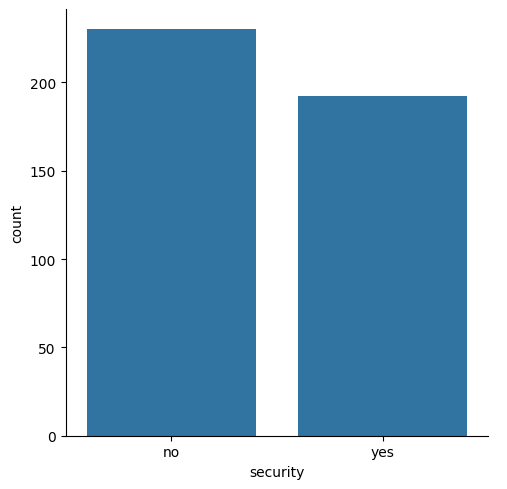

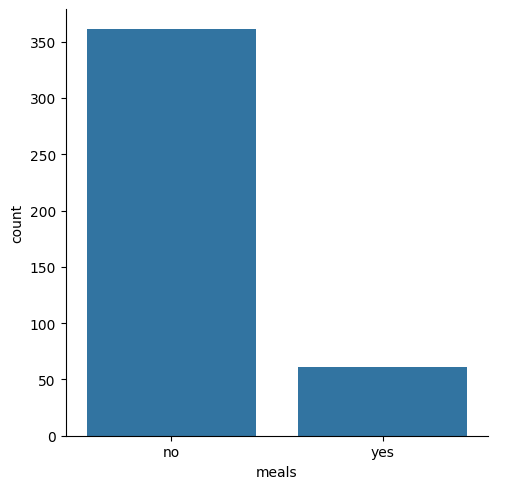

In [32]:
df.loc[df.Shelves == 'yes ', 'Shelves'] = 'yes'
df = df.loc[df.Shelves != ' yes']
df.loc[:, df.dtypes == 'category'].columns

df
for i in df.loc[:, df.dtypes == 'category'].columns:
    if i != 'Location':
        sns.catplot(kind='count', data=df, x=i)

<Axes: >

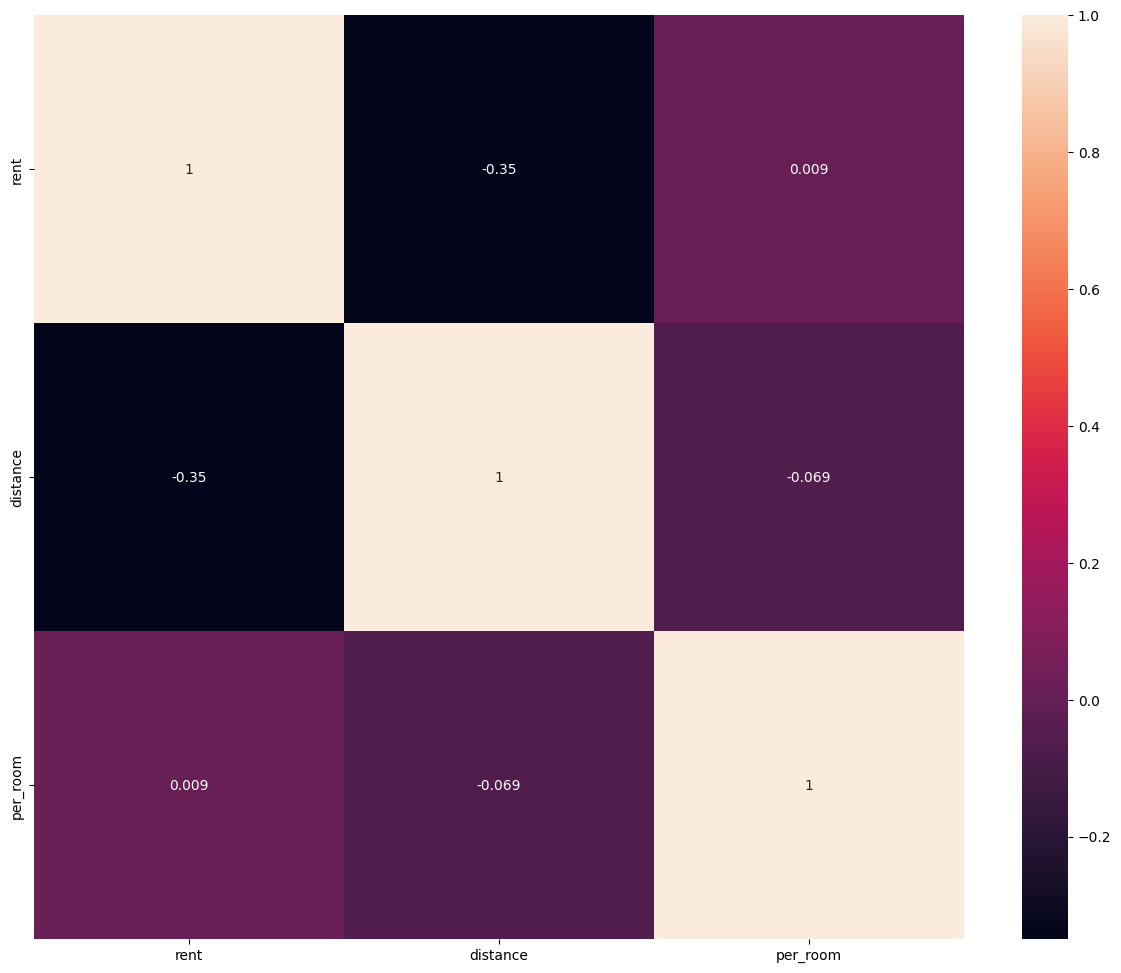

In [33]:
plt.figure(figsize=(15, 12))

sns.heatmap(df.loc[:, df.dtypes !='category'].corr(), annot=True)



## DATA PREPROCESSING


<Axes: >

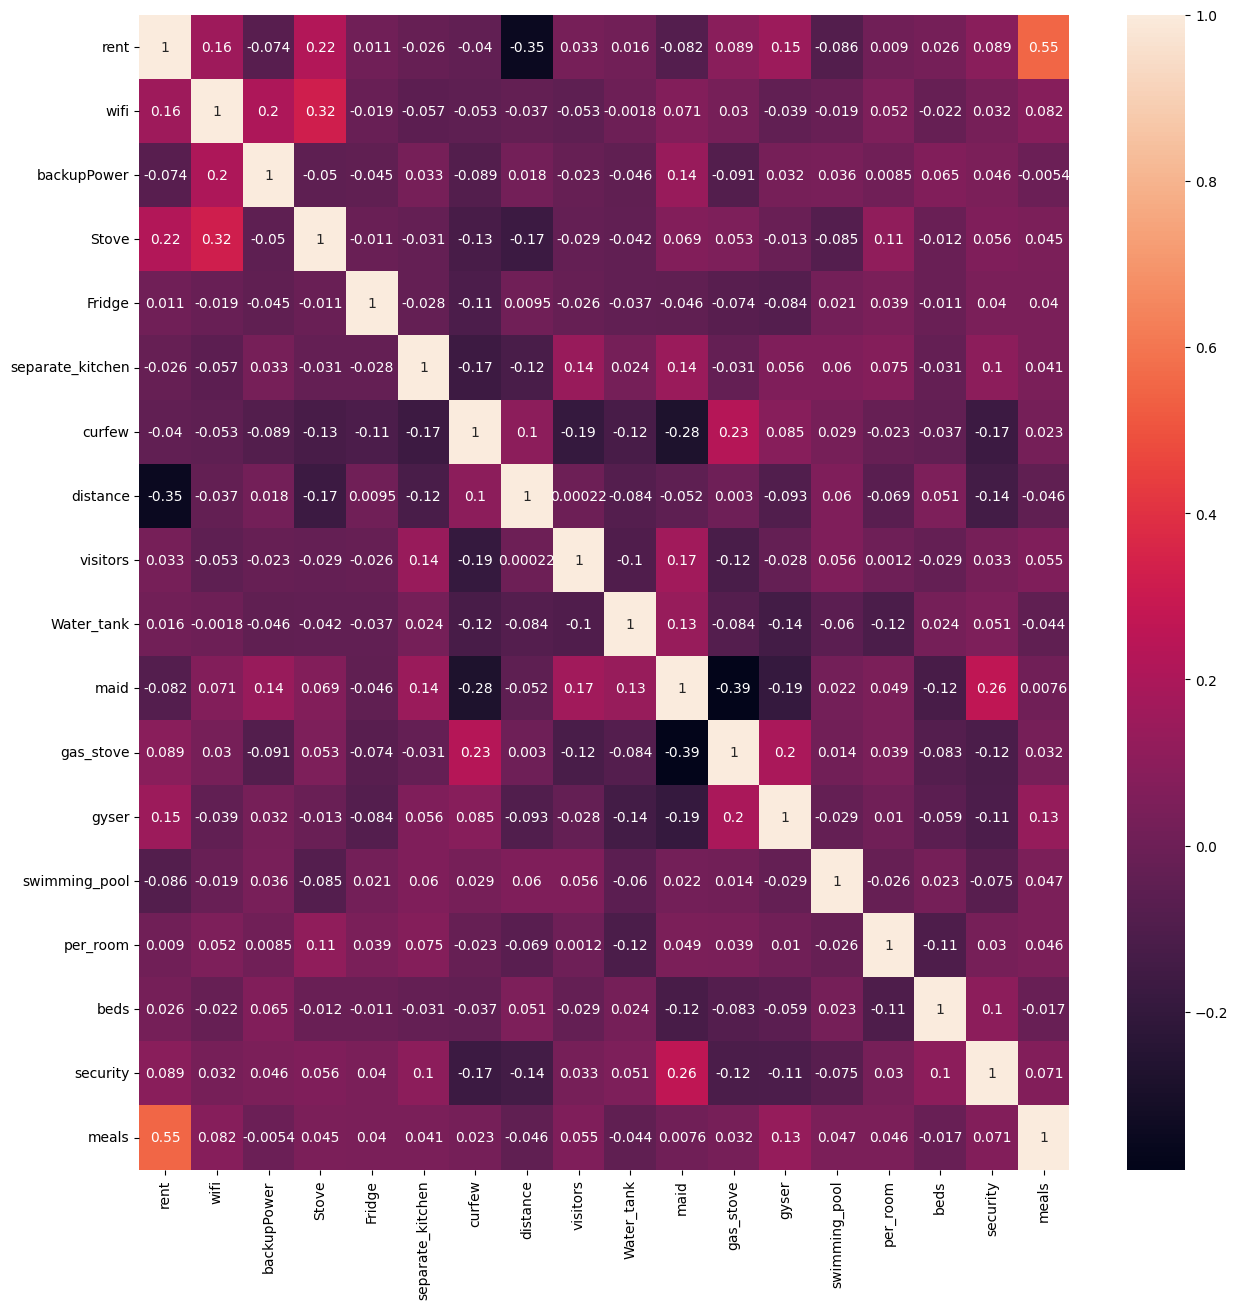

In [34]:

from sklearn.preprocessing import LabelEncoder
import math
df2 = df

le = LabelEncoder()

columns = [col for col in df.loc[:, df.dtypes ==
                                 'category'].columns if col not in ('Location', 'Shelves', 'gender')]

for column in columns:

    df[column] = le.fit_transform(df[column])


new_df = df[[col for col in df.columns if (col != 'Location') and (col != 'Shelves') and (col != 'gender')]  ]
plt.figure(figsize=(15,15))
sns.heatmap(new_df.corr(), annot= True)


In [35]:
df.columns

Index(['Location', 'rent', 'wifi', 'backupPower', 'Stove', 'Fridge',
       'separate_kitchen', 'curfew', 'distance', 'visitors', 'Shelves',
       'Water_tank', 'maid', 'gas_stove', 'gyser', 'gender', 'swimming_pool',
       'per_room', 'beds', 'security', 'meals'],
      dtype='object')

## TRAINING THE MODEL


In [36]:
# from sklearn.cluster import KMeans

# new_df = pd.DataFrame(X_transformed)
# new_df['y'] = df.rent
# kmeans = KMeans(n_clusters=2, random_state=0).fit_transform(pd.DataFrame(scaled))
# kmeans

# plt.figure(figsize=(12,7))
# bucket_width = 20

# # df['price_bucket'] = pd.cut(df['rent'], bins=range(min(df['rent']), max(df['rent']) + bucket_width, bucket_width))


# # Print the DataFrame
# sns.scatterplot(kmeans[:,1], kmeans[:,0])

# kdf = pd.DataFrame({'x': kmeans[:,1], 'y': kmeans[:,0] })
# kdf.loc[kdf.x > 14.5]
# # df = df.drop(kdf.x > 14.5)
# df['x'] = kmeans[:,0]
# df['y'] = kmeans[:,1]
# df.head(30)

shuffle(df).head()


,Location,rent,wifi,backupPower,Stove,Fridge,separate_kitchen,curfew,distance,visitors,...,Water_tank,maid,gas_stove,gyser,gender,swimming_pool,per_room,beds,security,meals
17,avondale,100,1,1,1,1,1,0,2.766319,1,...,1,1,0,0,both,0,4,1,1,0
59,marlbrough,100,1,1,1,1,1,1,2.708050,1,...,0,0,1,0,both,0,3,1,1,0
131,mt_pleasant,180,1,1,1,1,1,0,2.197225,1,...,1,0,0,0,both,0,3,1,1,1
163,belgravia,180,1,0,1,1,1,0,2.484907,1,...,1,1,0,0,both,0,3,1,1,1
421,main_gate,120,1,1,1,1,1,1,1.386294,1,...,1,1,0,0,boys,0,3,1,0,0


In [37]:




df = df.loc[~((df.meals == 0) & (df.rent > 179) &
              (df.Location == 'mt_pleasant')), :]
# df = df.drop([27])
df.loc[(df.meals == 1) & (df.rent < 170), 'meals'] = 0

X = df[(df.Location != 'avenue')].drop(labels=['rent'], axis=1)
y = df[(df.Location != 'avenue')].rent


# df[df.Location == 'parirenyatwa']

In [38]:
result = df.groupby('Location')['distance'].mean()
result

C:\Users\Augah\AppData\Local\Temp\ipykernel_18728\3926737252.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  result = df.groupby('Location')['distance'].mean()


Location
Alex park        0.693147
arundel          3.135494
avenue           3.321938
avondale         2.278743
belgravia        2.565075
borrowdale       2.071536
brighton_road    2.354677
churchill        2.187061
epping           2.035079
groombridge      2.302585
hatcliff         4.348476
main_gate        1.921422
marlbrough       2.738032
mt_pleasant      2.546036
op_uz            1.633488
parirenyatwa     2.413484
pendenis         2.913446
pomona           3.526361
vainona          3.317045
Name: distance, dtype: float64

In [39]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

one_hot = OneHotEncoder()
Transfromer = ColumnTransformer(
    [('one_hot', one_hot, ['Location', 'Shelves', 'gender'])], remainder='passthrough')
X_transformed = Transfromer.fit_transform(X)

0.13662836395171388


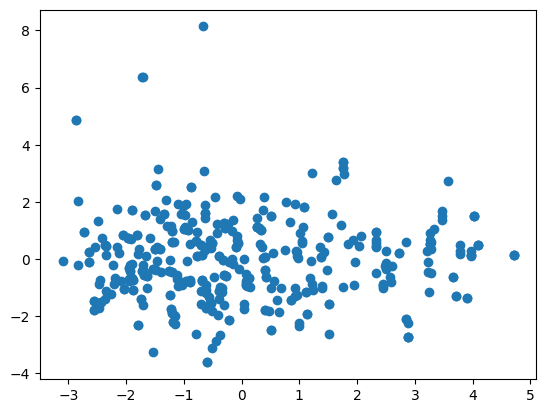

In [40]:
from sklearn.decomposition import PCA, KernelPCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE, Isomap

scaler = StandardScaler()
scaled = scaler.fit_transform(X_transformed)


pca = PCA(n_components= 2)

x_pca = pca.fit_transform(scaled)

print(pca.fit(scaled).explained_variance_ratio_.sum())

plt.scatter(x_pca.T[0], x_pca.T[1])

x_pca0 = pd.DataFrame(x_pca, columns=[40,41])
x = pd.DataFrame(X_transformed)

In [41]:
# from sklearn.cluster import KMeans

# new_df = pd.DataFrame(X_transformed)
# new_df['y'] = df.rent
# kmeans = KMeans(n_clusters=2, random_state=0).fit_transform(X_transformed)
# kmeans

# plt.figure(figsize=(12,7))
# bucket_width = 20

# # df['price_bucket'] = pd.cut(df['rent'], bins=range(min(df['rent']), max(df['rent']) + bucket_width, bucket_width))


# # Print the DataFrame
# # sns.scatterplot(kmeans[:,1], kmeans[:,0])

# kdf = pd.DataFrame({'x': kmeans[:,1], 'y': kmeans[:,0] })
# # kdf.loc[kdf.x > 14.5]
# df['x'] = kmeans[:,1]
# df['y'] = kmeans[:,0]



In [42]:
import tensorflow as tf
from tensorflow import keras


## MODELLING


In [43]:
from sklearn.discriminant_analysis import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LassoCV, LinearRegression, RidgeCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
# reg= SVR(kernel= 'rbf')

random_number = np.random.randint(1, 1000)

scaler = StandardScaler()
scaledData = scaler.fit_transform(X_transformed)

param_dist = {
    'max_depth': range(3, 10),
    'min_child_weight': range(1, 11),
    'gamma': np.arange(0, 5),
    # Use np.random.uniform for continuous range

    'learning_rate': np.arange(0.1, 0.5, 0.01),
    # Adjust upper bound based on computational resources
    'n_estimators': np.arange(10, 1001, 10),

}

# rs_reg = GridSearchCV(xgboost, param_grid=param_dist, cv=5, verbose=2)
# rs_reg.fit(X_transformed, y)
# rs_reg.best_score_


kNeighbors = KNeighborsRegressor()
svm = SVR()
LinearRegression = LassoCV()
randomForest = RandomForestRegressor()
xgboost = xgb.XGBRegressor(learning_rate=0.199999999999, n_estimators=184)

models = [{'name': "kNeighbors", "model": kNeighbors},
          {"name": "support vector machine", "model": svm},

          {"name": "LassoCV regression", "model": LinearRegression},
          {"name": "random forest", "model": randomForest
           }, {"name": "xgboost", "model": xgboost}]

X_train, X_test, y_train, y_test = train_test_split(
    X_transformed, y, test_size=0.2)
dtrain_reg = xgb.DMatrix(X_train, y_train)
dtest_reg = xgb.DMatrix(X_test, y_test)

result_dict = {}

for model in models:
    cv_result = cross_val_score(model['model'], scaledData,  y, cv=5).mean()
    result_dict[model['name']] = cv_result

print(pd.Series(result_dict))


pd.DataFrame(pd.Series(result_dict), columns = ['score'])

# errordf =  df[['rent', 'distance', 'meals', 'per_room']].merge(errordf, how= 'inner', left_index=True, right_index= True)
# errordf
# df[-84:].head(60)
xgboost.fit(X_train,y_train)
cross_val_score(xgboost,scaledData,y,cv = 5  ).mean()
# xgboost.score(X_test,y_test)



kNeighbors                0.606932
support vector machine    0.090007
LassoCV regression        0.718617
random forest             0.845761
xgboost                   0.874667
dtype: float64


0.8746674273255897

In [44]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import root_mean_squared_error

rmse_scores = {}
mae_scores = {}

for model in models:
    model['model'].fit(X_train,y_train)
    y_preds = model['model'].predict(X_test)
    rmse_scores[model['name']] = mean_absolute_error(y_test, y_preds)
    mae_scores[model['name']] = root_mean_squared_error(y_test, y_preds)

rmse_scores

{'kNeighbors': 19.634146341463413,
 'support vector machine': 26.082462292010117,
 'LassoCV regression': 15.177922505155843,
 'random forest': 10.199390243902439,
 'xgboost': 9.119601831203553}

In [45]:

# value = xgboost.predict(X_test[0:1,:])
import pickle
np.array([1]).tolist()[0]

# with open('model.pkl', 'wb') as f:
#     pickle.dump(xg, f)
with open('xg_boost.pkl', 'wb') as f:
    pickle.dump(xgboost, f)

In [46]:
from sklearn.metrics import r2_score
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(units=64, activation="relu",),  # First hidden layer
    keras.layers.Dense(units=32, activation="relu"),  # Second hidden layer
    keras.layers.Dense(units=1)  # Output layer for predicted rent price
])
model.compile(optimizer="adam", loss="mse", metrics=["mse"] )
model.fit(X_train, y_train, epochs=200, validation_data=(X_test, y_test))

loss,mse = model.evaluate(X_test, y_test)
preds =model.predict(X_test)
print(r2_score(y_test, preds))

Epoch 1/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 19268.4902 - mse: 19268.4902 - val_loss: 18696.8574 - val_mse: 18696.8574
Epoch 2/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 18040.5137 - mse: 18040.5137 - val_loss: 18208.4414 - val_mse: 18208.4414
Epoch 3/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 17122.9336 - mse: 17122.9336 - val_loss: 17512.4961 - val_mse: 17512.4961
Epoch 4/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 17249.3301 - mse: 17249.3301 - val_loss: 16469.6953 - val_mse: 16469.6953
Epoch 5/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 15569.2109 - mse: 15569.2109 - val_loss: 15004.3779 - val_mse: 15004.3779
Epoch 6/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 14711.4219 - mse: 14711.4219 - val_loss: 13047.3047 - val_mse: 13047.3047
Epoch 7/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 12601.8828 - mse: 12601.8828 - val_loss: 10587.4922 - val_mse: 10587.4922
Epoch 8/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 10404.04

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - loss: 319.1703 - mse: 319.1703  


325.5126037597656

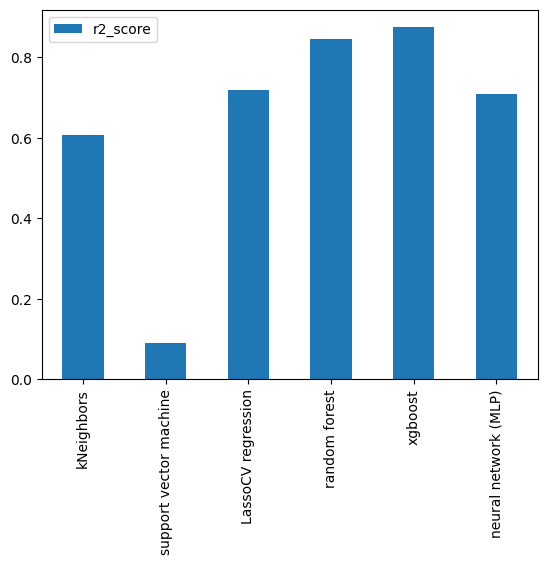

In [47]:
result_dict['neural network (MLP)'] = r2_score(y_test, preds)
mae_scores['neural network (MLP)'] = mean_absolute_error(y_test, preds)
rmse_scores['neural network (MLP)'] = root_mean_squared_error(y_test, preds)




score_df= pd.DataFrame(pd.Series(result_dict), columns = ['r2_score'])
score_df
score_df.plot.bar()
loss,mse = model.evaluate(X_test, y_test)
mse

Text(0, 0.5, 'value')

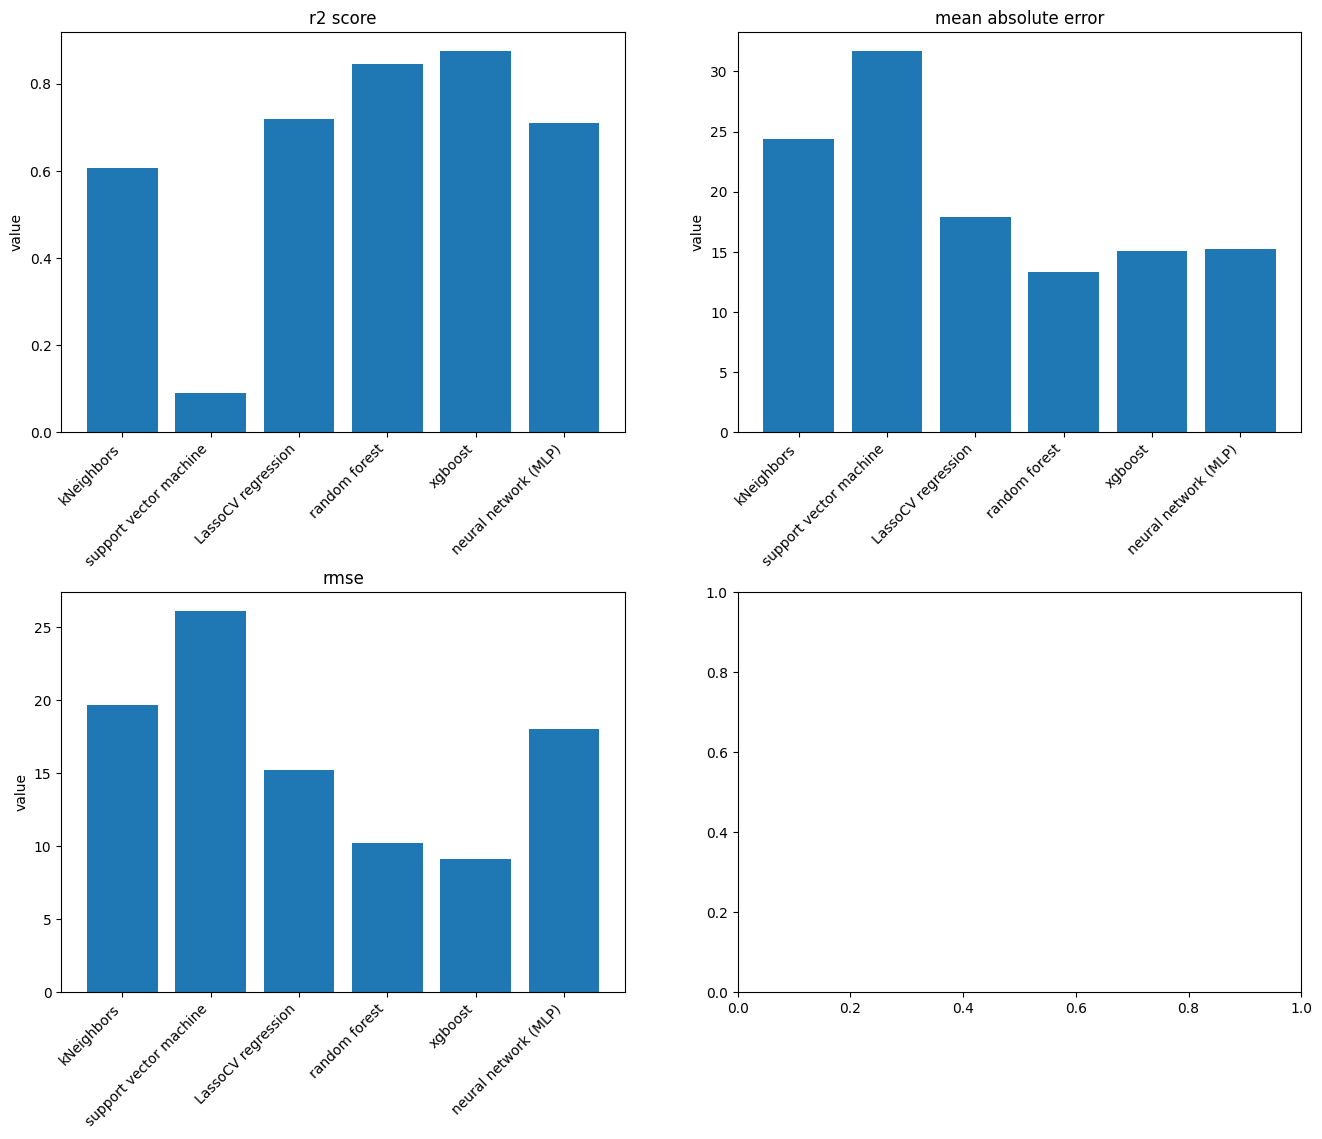

In [48]:
fig, ((ax, ax1), (ax2, ax3)) = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))
plt.subplots_adjust(bottom=0.1, top=0.9, hspace=0.4)
ax.bar(list(result_dict.keys()), list(result_dict.values()))
ax1.bar(list(mae_scores.keys()), list(mae_scores.values()))
ax2.bar(list(rmse_scores.keys()), list(rmse_scores.values()))


ax.set_title('r2 score')
ax1.set_title('mean absolute error')
ax2.set_title('rmse')



plt.setp(ax.get_xticklabels(), rotation=45, ha='right')
plt.setp(ax1.get_xticklabels(), rotation=45, ha='right')
plt.setp(ax2.get_xticklabels(), rotation=45, ha='right')

ax.set_ylabel('value')
ax1.set_ylabel('value')
ax2.set_ylabel('value')

Text(0.5, 1.0, 'mean absolute error')

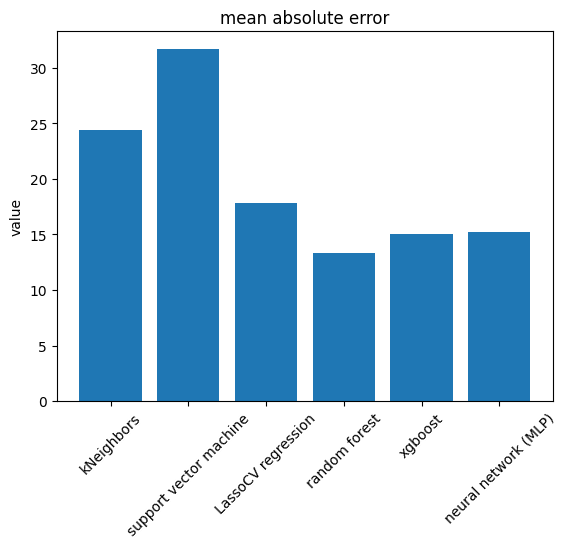

In [49]:
plt.bar(list(mae_scores.keys()), list(mae_scores.values()))
plt.xticks(rotation = 45)
plt.ylabel('value')
plt.title('mean absolute error')

Text(0.5, 1.0, 'rmse')

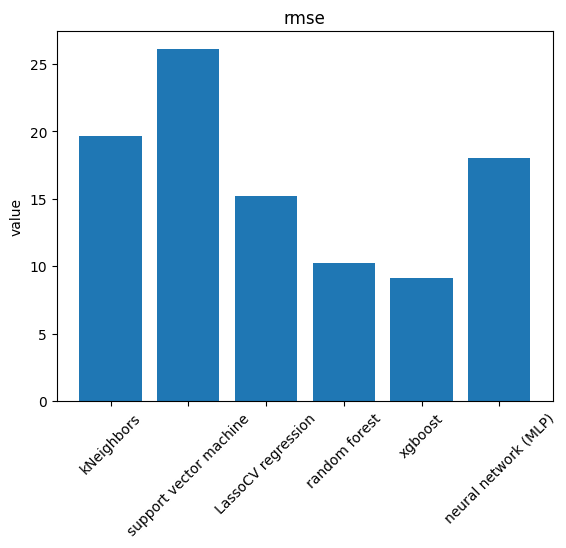

In [50]:
plt.bar(list(rmse_scores.keys()), list(rmse_scores.values()))
plt.xticks(rotation = 45)
plt.ylabel('value')
plt.title('rmse')

In [57]:
mae_scores

{'kNeighbors': 24.418605461469884,
 'support vector machine': 31.68781540610771,
 'LassoCV regression': 17.862286743776973,
 'random forest': 13.318443795051705,
 'xgboost': 15.03832649841155,
 'neural network (MLP)': 15.218036558569931}

In [52]:

# # Adjust the list length and colors as needed
# colors = ["blue", "green", "red", "orange", "yellow"]
# score_df.plot.bar(color=colors)

# xg

In [53]:
# pd.DataFrame(
    # {'preds': pd.Series(preds.T[0], index=y_test.index), 'y_test': y_test})
# pd.Series(preds.T[0], index= y_test.index)

In [54]:
df[df.Location == 'Alex park']

,Location,rent,wifi,backupPower,Stove,Fridge,separate_kitchen,curfew,distance,visitors,...,Water_tank,maid,gas_stove,gyser,gender,swimming_pool,per_room,beds,security,meals
27,Alex park,150,1,0,1,1,0,0,0.693147,1,...,1,0,1,0,both,0,3,1,1,0


In [55]:
xg

NameError: name 'xg' is not defined

In [ ]:
# new_df = df.merge(errordf, how= 'inner', left_index=True, right_index= True)
# new_df2 = df.merge(errordf, how= 'inner', left_index=True, right_index= True)

In [ ]:
# new_df[new_df.error>10][['Location', 'y_preds', 'y_test', 'error']]
# # new_df[new_df.error>7][['Location', 'y_preds', 'y_test']]

In [ ]:
df[df.Location == 'mount_pleasant']

,Location,rent,wifi,backupPower,Stove,Fridge,separate_kitchen,curfew,distance,visitors,...,Water_tank,maid,gas_stove,gyser,gender,swimming_pool,per_room,beds,security,meals


In [ ]:
df.loc[[117, 195]]

,Location,rent,wifi,backupPower,Stove,Fridge,separate_kitchen,curfew,distance,visitors,...,Water_tank,maid,gas_stove,gyser,gender,swimming_pool,per_room,beds,security,meals
117,mt_pleasant,135,1,1,1,1,0,0,3.401197,1,...,1,0,1,1,girls,0,2,1,0,0
195,mt_pleasant,135,1,1,1,1,1,1,1.945910,1,...,0,0,0,0,girls,1,3,1,0,0


In [ ]:
import pickle


# with open('model.pkl', 'wb') as f:
#     pickle.dump(xg, f)
with open('transformer.pkl', 'wb') as f:
    pickle.dump(Transfromer, f)



# from pydantic import BaseModel

# class House(BaseModel):
#     Location: str
#     wifi: int
#     backupPower: int
#     Stove:int
#     Fridge:int
#     separate_kitchen: int
#     curfew: int
#     distance: float
#     visitors:int
#     Shelves:str
#     Water_tank: int
#     maid: int
#     gas_stove: int
#     gyser:int
#     gender: str
#     swimming_pool:int
#     per_room:int
#     beds:int
#     security: int
#     meals:int


# app = FastAPI()

# # with open('model.pkl', 'rb') as f:
# #     model = pickle.load(f)
# #     print(model)
# # transformer   = pickle(open('transformer.pkl', 'rb'))

# @app.post('/predict')
# async def predict(data: House):

#     # point = pd.Series(data).to_frame().T


#     return 'augah'

# import sklearn
# print(sklearn.__version__)

In [ ]:
data = {'Location': 'mt_pleasant', 'wifi': 1, 'backupPower': 1, 'Stove': 1, 'Fridge': 0,
        'separate_kitchen': 1, 'curfew': 0, 'distance': 2.456, 'visitors': 1, 'Shelves': 'yes',
        'Water_tank': 1, 'maid': 1, 'gas_stove': 1, 'gyser': 1, 'gender': 'both', 'swimming_pool': 0,
        'per_room': 5, 'beds': 0, 'security': 1, 'meals': 1}

In [ ]:
# point = Transfromer.transform(pd.DataFrame(data, index=range(0,1)))
pd.DataFrame(data, index=range(0,1)).to_numpy()
# point

array([['mt_pleasant', 1, 1, 1, 0, 1, 0, 2.456, 1, 'yes', 1, 1, 1, 1,
        'both', 0, 5, 0, 1, 1]], dtype=object)

In [ ]:
augah ={
    "Location": {
        "0": "mt_pleasant", "1": "mt_pleasant"
    },
    "wifi": {
        "0": 1,"1":0
    },
    "backupPower": {
        "0": 
            1,"1":1
        
    },
   }

In [ ]:
(pd.DataFrame(augah))

,Location,wifi,backupPower
0,mt_pleasant,1,1
1,mt_pleasant,0,1
